In [116]:
import os, sys
from IPython.display import Image
import pandas as pd
from __future__ import division
import numpy as np
import rpy2
from rpy2 import robjects as ro
import pandas.rpy.common as com
import matplotlib.pyplot as plt
import seaborn as sns
import operator
import scipy as sp
import traceback
from sklearn import preprocessing
from IPython.parallel import Client
from subprocess import Popen, PIPE
import shutil
from IPython.display import FileLink, FileLinks, Image
import psutil
import multiprocessing
from hdfstorehelper import HDFStoreHelper
import warnings
import pandas
import dill
import statsmodels as sm
import statsmodels.formula.api as smf
from scipy.stats.stats import pearsonr
from statsmodels.sandbox.stats.multicomp import multipletests
warnings.simplefilter("ignore", pandas.io.pytables.PerformanceWarning)
%matplotlib inline

%load_ext rpy2.ipython
pd.set_option('display.width', 80)
pd.set_option('max.columns', 30)

%load_ext autoreload
%autoreload 2

sns.set_context("talk")

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [103]:
r = ro.r

In [118]:
hdf = HDFStoreHelper("cfried.hd5")

In [3]:
trait_name = str(dill.load(open("cfried_trait_name.dill")))

In [4]:
bayenv_df = hdf.get("bayenv_df")

In [5]:
bayenv_df.head()

,county,state,lat,long,county_state,countyid,0-10037-01-257,0-10040-02-394,0-10044-01-392,0-10048-01-60,0-10051-02-166,0-10054-01-402,0-10067-03-111,0-10079-02-168,0-10112-01-169,...,UMN-CL299Contig1-01-46,UMN-CL306Contig1-04-261,UMN-CL307Contig1-04-143,UMN-CL319Contig1-03-131,UMN-CL326Contig1-05-421,UMN-CL339Contig1-05-39,UMN-CL34Contig1-03-89,UMN-CL353Contig1-04-64,UMN-CL362Contig1-07-133,UMN-CL363Contig1-01-233,UMN-CL379Contig1-12-117,UMN-CL424Contig1-03-94,UMN-CL54Contig1-07-88,UMN-CL91Contig1-02-246,UMN-CL97Contig
0,CHEROKEE,GA,34.24000,-84.47000,CHEROKEE_GA,NaN,22,12,22,22,11,12,11,11,12,...,11,11,11,12,12,11,12,11,NA,11,11,11,11,11,12
1,BARTOW,GA,34.24000,-84.84000,BARTOW_GA,NaN,11,11,22,22,11,12,11,12,11,...,11,11,11,11,11,11,11,11,22,11,11,12,12,11,22
3,KING & QUEEN,VA,37.66986,-76.87746,KING & QUEEN_VA,NaN,11,22,11,11,12,11,11,11,11,...,11,11,11,11,11,11,12,11,NA,12,11,12,12,11,11
4,KING & QUEEN,VA,37.66986,-76.87746,KING & QUEEN_VA,NaN,11,12,11,NA,11,12,11,11,11,...,11,11,12,11,11,11,12,11,11,12,11,12,11,12,11
5,NEW KENT,VA,37.51160,-76.97319,NEW KENT_VA,NaN,12,11,12,22,11,12,11,11,11,...,11,11,12,11,12,11,12,11,NA,12,11,12,11,12,12


In [7]:
county_id = dill.load(open("county_id.dill"))

In [11]:
def add_county_id(row):
    key = "%s_%s" % (row.county,row.state)
    if key in county_id:
        return county_id[key]
    return np.nan
bayenv_df['countyid'] = bayenv_df.apply(add_county_id, axis=1)

In [16]:
bayenv_df.head(10)

,county,state,lat,long,county_state,countyid,0-10037-01-257,0-10040-02-394,0-10044-01-392,0-10048-01-60,0-10051-02-166,0-10054-01-402,0-10067-03-111,0-10079-02-168,0-10112-01-169,...,UMN-CL299Contig1-01-46,UMN-CL306Contig1-04-261,UMN-CL307Contig1-04-143,UMN-CL319Contig1-03-131,UMN-CL326Contig1-05-421,UMN-CL339Contig1-05-39,UMN-CL34Contig1-03-89,UMN-CL353Contig1-04-64,UMN-CL362Contig1-07-133,UMN-CL363Contig1-01-233,UMN-CL379Contig1-12-117,UMN-CL424Contig1-03-94,UMN-CL54Contig1-07-88,UMN-CL91Contig1-02-246,UMN-CL97Contig
0,CHEROKEE,GA,34.24000,-84.47000,CHEROKEE_GA,NaN,22,12,22,22,11,12,11,11,12,...,11,11,11,12,12,11,12,11,NA,11,11,11,11,11,12
1,BARTOW,GA,34.24000,-84.84000,BARTOW_GA,NaN,11,11,22,22,11,12,11,12,11,...,11,11,11,11,11,11,11,11,22,11,11,12,12,11,22
3,KING & QUEEN,VA,37.66986,-76.87746,KING & QUEEN_VA,NaN,11,22,11,11,12,11,11,11,11,...,11,11,11,11,11,11,12,11,NA,12,11,12,12,11,11
4,KING & QUEEN,VA,37.66986,-76.87746,KING & QUEEN_VA,NaN,11,12,11,NA,11,12,11,11,11,...,11,11,12,11,11,11,12,11,11,12,11,12,11,12,11
5,NEW KENT,VA,37.51160,-76.97319,NEW KENT_VA,NaN,12,11,12,22,11,12,11,11,11,...,11,11,12,11,12,11,12,11,NA,12,11,12,11,12,12
6,WARREN,NC,34.80551,-76.80890,WARREN_NC,NaN,11,22,22,12,11,12,11,11,11,...,12,11,12,12,11,11,11,11,11,11,11,12,22,11,12
7,NORTHAMPTON,NC,36.39032,-77.42219,NORTHAMPTON_NC,NaN,12,12,12,11,12,12,11,11,11,...,11,11,11,12,12,11,12,11,12,12,11,11,12,11,22
8,COLUMBUS,NC,34.33010,-78.70453,COLUMBUS_NC,11,NA,22,11,11,11,11,11,11,11,...,11,NA,12,11,11,11,11,11,NA,11,11,12,11,12,22
10,ONSLOW,NC,34.75963,-77.40977,ONSLOW_NC,26,11,22,12,11,11,12,11,11,11,...,11,11,11,11,12,11,12,11,12,11,11,11,12,11,11
11,ONSLOW,NC,34.75963,-77.40977,ONSLOW_NC,26,11,12,NA,12,11,12,11,11,11,...,11,11,11,12,NA,11,11,11,11,11,11,11,12,11,12


In [31]:
bayenv_df = bayenv_df[bayenv_df.countyid > 0]

In [62]:
def convert_to_snpassoc(col):
    if "-" in col.name:
        freqs = af[col.name]
        trans = {11: "%s/%s" % (freqs["A"], freqs["A"]),
                12: "%s/%s" % (freqs["A"], freqs["a"]),
                22: "%s/%s" % (freqs["a"], freqs["a"]),
                "NA":"NA"}
        return col.apply(lambda x: trans[x])
    return col

def is_homozygous(gt):
    if len(set([x.strip() for x in gt.split("/")])) == 1:
        return True
    return False

def get_allele_counts(counts):
    a = {}
    het = 0
    for gt in counts.index:
        alleles = None
        if "/" in gt:
            alleles = [x.strip() for x in gt.split("/")]
        else:
            alleles = gt
        for allele in alleles:
            if not allele in a:
                a[allele] = 0
            a[allele] += counts[gt]
        if not is_homozygous(gt):
            het += counts[gt]
    return sorted(a.items(), key=lambda x: x[1], reverse=True), het


def get_correction(n):
    #for finite sample size
    return (2*n)/(2*n-1)

def get_allele_freqs(locus):
    locus = locus[locus != '?/?']
    locus = locus[locus != 'NA']
    c = locus.value_counts()
    c = c.sort(inplace=False, ascending=False)
    allele_counts = get_allele_counts(c)
    total_alleles = 2.0*sum(c)
    num_individuals = sum(c)
    A = ""
    a = ""
    P = 0
    Q = 0
    if len(allele_counts[0]) == 2:
        A = allele_counts[0][0][0]
        a = allele_counts[0][1][0]
        P = allele_counts[0][0][1]
        Q = allele_counts[0][1][1]
    else:
        A = allele_counts[0][0][0]
        P = P = allele_counts[0][0][1]
    PQ = allele_counts[-1]
    p = P/total_alleles
    q = Q/total_alleles
    assert p + q == 1.0
    He = 2 * p * q * get_correction(num_individuals)
    Ho = PQ*1.0/num_individuals
    Fis = 1 - (Ho/He)
    #print p, q, He, Ho, Fis
    ret = pd.Series({"p":p, 
                      "q":q,
                      "P":P,
                      "Q":Q,
                      "He":He,
                      "Ho":Ho, 
                      "Fis":Fis,
                    "PQ": PQ,
                    "total_alleles":total_alleles,
                    "num_indiv":num_individuals,
                    "A":A,
                    "a":a})
    return ret

In [61]:
af = hdf.get("af")
bayenv_df = bayenv_df.apply(convert_to_snpassoc)

In [63]:
pop_allele_freqs = {}
for pop,data in bayenv_df.groupby("countyid"):
    print "getting allele freqs for pop % d" % pop
    pop_allele_freqs[pop] = data.ix[:,6:].apply(get_allele_freqs)

getting allele freqs for pop  1
getting allele freqs for pop  2
getting allele freqs for pop  3
getting allele freqs for pop  4
getting allele freqs for pop  5
getting allele freqs for pop  6
getting allele freqs for pop  7
getting allele freqs for pop  8
getting allele freqs for pop  9
getting allele freqs for pop  10
getting allele freqs for pop  11
getting allele freqs for pop  12
getting allele freqs for pop  13
getting allele freqs for pop  14
getting allele freqs for pop  15
getting allele freqs for pop  16
getting allele freqs for pop  17
getting allele freqs for pop  18
getting allele freqs for pop  19
getting allele freqs for pop  20
getting allele freqs for pop  21
getting allele freqs for pop  22
getting allele freqs for pop  23
getting allele freqs for pop  24
getting allele freqs for pop  25
getting allele freqs for pop  26
getting allele freqs for pop  27
getting allele freqs for pop  28
getting allele freqs for pop  29
getting allele freqs for pop  30
getting allele freq

In [64]:
def get_bayenv_snp(snp_name, popids):
    P = []
    Q = []
    for popid in popids:
        P.append(pop_allele_freqs[popid].ix["P",name])
        Q.append(pop_allele_freqs[popid].ix["Q",name])
    return P, Q

def write_bayenv_snp(fh_snp, fh_names, name, P, Q):
    if sum(Q) > 0: #exclude monomorphic loci
        if fh_names:
            fh_names.write("%s\n" % name)
        P = [str(x) for x in P]
        Q = [str(x) for x in Q]
        fh_snp.write("%s\t\n" % "\t".join(Q))
        fh_snp.write("%s\t\n" % "\t".join(P))

In [127]:
bayenv_dir = "bayenv"
snp_names = [x for x in bayenv_df.columns if "-" in x]
popids = sorted(bayenv_df.countyid.unique())

if not os.path.exists(bayenv_dir):
    os.mkdir(bayenv_dir)

with open("bayenv.txt", "w") as o:
    with open("bayenv_names.txt", "w") as n:
        for name in snp_names:
            P,Q = get_bayenv_snp(name, popids)
            write_bayenv_snp(o, n, name, P, Q)

In [128]:
!head -n2 bayenv.txt

4	23	3	4	5	5	4	6	3	5	3	14	4	4	8	4	5	2	5	3	7	3	7	7	7	5	12	4	3	1	3	37	3	5	
14	45	11	8	17	11	6	20	9	5	7	28	12	14	26	8	15	10	17	9	19	9	9	7	15	19	20	14	7	13	7	89	11	9	


In [129]:
!cp bayenv.txt bayenv/

##Run Bayenv to create variance-covariance matrix

```bash
    cd bayenv && /gdc_home4/cfried/src/bayenv2/bayenv2 -i bayenv.txt -p 30 -k 100000 -r 63479 > matrix.out
```

* -p number of populations (`len(popids)`)
* -k mcmc generations
* -r random seed

## Run Bayenv mcmc

In [78]:
data_ai = hdf.get("data_ai")
data_ai['county_state'] = data_ai.apply(lambda row: "%s_%s" % (row.County, row.State), axis=1)
bayenv_df_ai = bayenv_df.merge(data_ai, on='county_state')
bayenv_df_ai.head()

,county,state,lat,long,county_state,countyid,0-10037-01-257,0-10040-02-394,0-10044-01-392,0-10048-01-60,0-10051-02-166,0-10054-01-402,0-10067-03-111,0-10079-02-168,0-10112-01-169,...,UMN-CL34Contig1-03-89,UMN-CL353Contig1-04-64,UMN-CL362Contig1-07-133,UMN-CL363Contig1-01-233,UMN-CL379Contig1-12-117,UMN-CL424Contig1-03-94,UMN-CL54Contig1-07-88,UMN-CL91Contig1-02-246,UMN-CL97Contig,County,State,AI_Q1,AI_Q2,AI_Q3,AI_Q4
0,COLUMBUS,NC,34.3301,-78.70453,COLUMBUS_NC,11,NA,A/A,C/C,G/G,G/G,G/G,A/A,G/G,A/A,...,G/G,A/A,NA,G/G,A/A,C/A,G/G,C/A,A/A,COLUMBUS,NC,6.737349,1.031164,1.017138,2.443279
1,COLUMBUS,NC,34.3301,-78.70453,COLUMBUS_NC,11,A/G,C/C,C/C,G/A,G/G,G/A,A/A,G/G,A/A,...,G/G,A/A,C/A,G/G,A/A,C/A,G/A,C/C,G/A,COLUMBUS,NC,6.737349,1.031164,1.017138,2.443279
2,COLUMBUS,NC,34.3301,-78.70453,COLUMBUS_NC,11,A/G,C/C,G/G,G/G,G/A,G/A,A/A,G/G,A/A,...,G/G,A/A,C/C,G/A,A/A,C/C,G/G,C/C,G/G,COLUMBUS,NC,6.737349,1.031164,1.017138,2.443279
3,COLUMBUS,NC,34.3301,-78.70453,COLUMBUS_NC,11,A/A,C/A,C/G,G/G,G/A,G/G,A/A,G/A,A/A,...,G/C,A/A,C/C,G/G,A/A,C/C,G/G,C/C,G/A,COLUMBUS,NC,6.737349,1.031164,1.017138,2.443279
4,COLUMBUS,NC,34.3301,-78.70453,COLUMBUS_NC,11,A/G,C/A,C/G,G/G,G/G,G/G,A/A,G/G,A/A,...,G/G,A/A,C/C,G/G,A/A,C/A,A/A,C/C,G/A,COLUMBUS,NC,6.737349,1.031164,1.017138,2.443279


In [79]:
bayenv_df_ai.shape

(388, 3094)

In [81]:
def get_bayenv_env(data):
    E = pd.Series()
    for col in data.columns[:-1]:
        E[col] = data[col].values[0]
    return E

ai_cols = [x for x in bayenv_df_ai if 'AI_' in x]
ai_cols.append('countyid')
bayenv_df_ai_groups = bayenv_df_ai.ix[:,ai_cols].groupby("countyid")
env_ai = []
for popid in popids:
    env_ai.append(get_bayenv_env(bayenv_df_ai_groups.get_group(popid))) 
env_ai_df = pd.DataFrame(env_ai).T
env_ai_df = env_ai_df.apply(preprocessing.scale, axis=1)
env_ai_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,...,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33
AI_Q1,-0.543192,-0.224174,-0.264691,-0.466561,-0.445484,-0.292720,-0.580444,1.947866,0.955898,-0.468096,0.106716,-0.401456,-1.109503,-0.351097,1.784894,...,0.739313,-0.849102,-0.143519,-0.492753,-1.346197,-0.154306,-0.322422,1.518583,-0.748163,-0.723340,1.638606,-0.870276,1.948834,-1.172916,2.073411
AI_Q2,-1.249341,0.202634,0.209415,-0.233210,-0.239005,-1.064694,-1.493350,1.365373,1.336554,0.379529,0.047695,0.239023,-1.465602,-0.013303,1.093395,...,0.216930,1.362245,0.634253,-1.151339,1.175674,-0.971686,0.309209,1.112855,-1.439820,-1.253046,0.926881,-1.240997,1.468511,-1.366513,1.042215
AI_Q3,-0.309792,0.633278,0.889383,0.219365,1.658925,-0.657004,-0.680271,-0.421831,-0.250408,-1.155304,0.751771,1.164951,-0.654465,1.352265,-0.745726,...,-0.838245,2.218533,1.473085,-0.877542,-1.363928,-0.526432,1.477762,-0.579602,-0.503145,-0.890514,-0.633030,-0.525839,-0.622012,-0.733373,-0.372875
AI_Q4,-0.557166,-0.684624,-0.865643,-0.674399,-0.498381,-0.182639,-0.290664,1.703533,0.983468,1.225337,-0.661674,-0.546989,-0.544675,-0.226710,1.328161,...,0.802163,-1.620242,-0.273565,-0.068398,0.617248,-0.542738,-0.494581,1.581698,-0.338859,0.250164,1.503820,-0.761220,1.537409,-1.111650,1.236709


In [126]:
def setup_bayenv_cmd(snpfile, name):
    work_dir = "/gdc_home4/cfried/ipython/bayenv"
    bayenv = "/gdc_home4/cfried/src/bayenv2/bayenv2"
    bayenv_matrix = "matrix_last.out"
    bayenv_seed = -47372
    bayenv_pops = 12
    bayenv_runs = 100000
    bayenv_environs = 4
    bayenv_envmatrix = "envmatrix.txt"
    bayenv_cmd = "cd %s/%s && %s -i %s -m %s -e %s -p %d -k %d -n %d -t -c -f -X -o %s" % (work_dir, 
                                                                                        name,
                                                                                        bayenv,
                                                                         snpfile,
                                                                         bayenv_matrix,
                                                                         bayenv_envmatrix,
                                                                         bayenv_pops,
                                                                     bayenv_runs,
                                                                     bayenv_environs,
                                                                             snpfile)
    shutil.copy(bayenv_matrix, os.path.join(work_dir, name))
    shutil.copy(bayenv_envmatrix, os.path.join(work_dir, name))
    return bayenv_cmd


In [130]:
cmds = []
if not os.path.exists(bayenv_dir):
    os.mkdir(bayenv_dir)

for name in snp_names:
    P,Q = get_bayenv_snp(name,popids)
    if sum(Q) > 0:
        file_dir = os.path.join(bayenv_dir, name)        
        if not os.path.exists(file_dir):
            os.mkdir(file_dir)
        o = open(os.path.join(file_dir, "%s.txt" % name), "w")
        write_bayenv_snp(o, None, name, P, Q)
        o.close()
        cmd = setup_bayenv_cmd(os.path.basename(o.name), name)
        cmds.append(cmd)

In [187]:
with open("bayenv_jobs.txt", "w") as o:
    cpu = 0
    max_cpus = 15
    for cmd in cmds:
        c = cmd.split()
        c[2] = "&& taskset -c %d" % cpu
        o.write("%s\n" % " ".join(c))
        cpu += 1
        if cpu == max_cpus:
            cpu = 0
        

## Run all the commands

```bash
cat bayenv_jobs.txt | parallel -j 20 --eta --
```

In [189]:
bf_files = !find {bayenv_dir} | grep bf
len(bf_files)

3071

In [190]:
bf_files[0:10]

['bayenv/0-10037-01-257/0-10037-01-257.txt.bf',
 'bayenv/0-10040-02-394/0-10040-02-394.txt.bf',
 'bayenv/0-10044-01-392/0-10044-01-392.txt.bf',
 'bayenv/0-10048-01-60/0-10048-01-60.txt.bf',
 'bayenv/0-10051-02-166/0-10051-02-166.txt.bf',
 'bayenv/0-10054-01-402/0-10054-01-402.txt.bf',
 'bayenv/0-10067-03-111/0-10067-03-111.txt.bf',
 'bayenv/0-10079-02-168/0-10079-02-168.txt.bf',
 'bayenv/0-10112-01-169/0-10112-01-169.txt.bf',
 'bayenv/0-10113-01-119/0-10113-01-119.txt.bf']

In [191]:
bf_data = {}
for b in bf_files:
    d = open(b).readlines()
    d = d[-1].strip().split("\t")[1:]
    if len(d) == 12:
        bf_data[os.path.basename(b).replace(".txt.bf","")] = d

In [192]:
bf = pd.DataFrame(bf_data).T.astype(float)
bf.shape

(3071, 12)

In [193]:
bf.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0-10037-01-257,0.22392,0.011299,0.034174,0.44114,0.040633,0.034273,0.27487,0.043062,0.031479,0.22885,0.092418,0.041913
0-10040-02-394,0.22877,0.030548,0.023372,0.20977,0.015900,0.026946,0.18643,-0.000221,0.003118,0.21680,0.028598,0.025316
0-10044-01-392,0.28590,-0.036511,-0.060585,0.45239,-0.059036,-0.098697,0.31888,0.016526,0.017430,0.29606,-0.050350,-0.084314
0-10048-01-60,0.21539,-0.003312,0.029548,0.28673,0.071402,0.056651,0.26453,0.020648,0.011469,0.22765,0.026610,0.014542
0-10051-02-166,0.18754,-0.107550,0.073651,0.18361,-0.000699,0.034835,0.25206,-0.002576,-0.079111,0.16912,-0.019028,0.057823


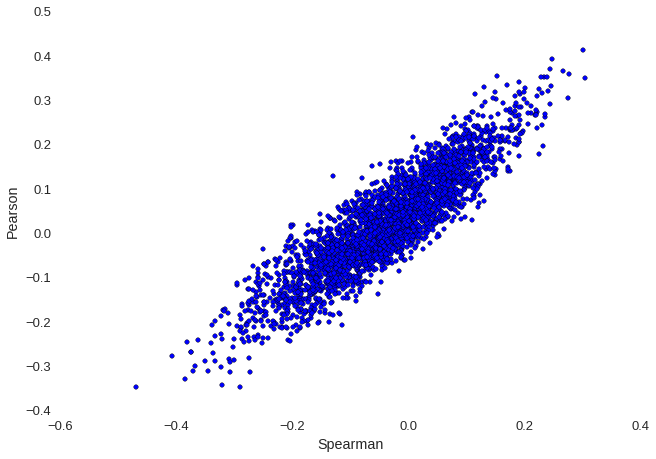

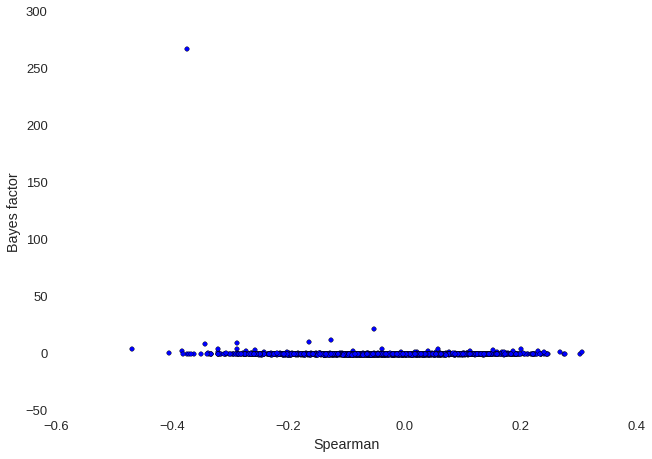

In [194]:
plt.scatter(bf.ix[:,1], bf.ix[:,2])
plt.xlabel("Spearman")
plt.ylabel("Pearson")
plt.show()

plt.scatter(bf.ix[:,1], bf.ix[:,0])
plt.xlabel("Spearman")
plt.ylabel("Bayes factor")
plt.show()

##Outlier analysis

In [195]:
def get_outliers(df, key, num_std):
    if key == "bf":
        key = 0
    elif key == "rho":
        key = 1  
    outliers = {}   
    ai = 0
    for i in xrange(key, len(df.columns), 3):
        d = df.ix[:,i]
        d_std = np.std(d)
        d_mean = np.mean(d)
        cutoffs = [d_mean + (num_std*d_std), d_mean - (num_std*d_std)]
        env = ai_cols[ai]
        outliers[env] = d[(d >= cutoffs[0]) | (d <= cutoffs[1])]
        ai += 1
    return outliers

In [196]:
def plot_outliers(df, key, num_std):
    if key == "bf":
        key = 0
    elif key == "rho":
        key = 1   
    ai = 0
    for i in xrange(key, len(df.columns), 3):
        d = df.ix[:,i]
        d_std = np.std(d)
        d_mean = np.mean(d)
        env = ai_cols[ai]
        ax = plt.gca()
        if key == 0:
            ax.set_yscale('log')
        plt.hist(d, bins=100)
        plt.xlim(np.min(d), d_mean+(num_std*d_std))
        plt.title("%s $\mu = %.4f \pm %.4f [%.4f, %.4f])$" % (env,
                                                            d_mean,
                                                            d_std,
                                                            np.min(d),
                                                            np.max(d)))
        plt.show()
        ai += 1

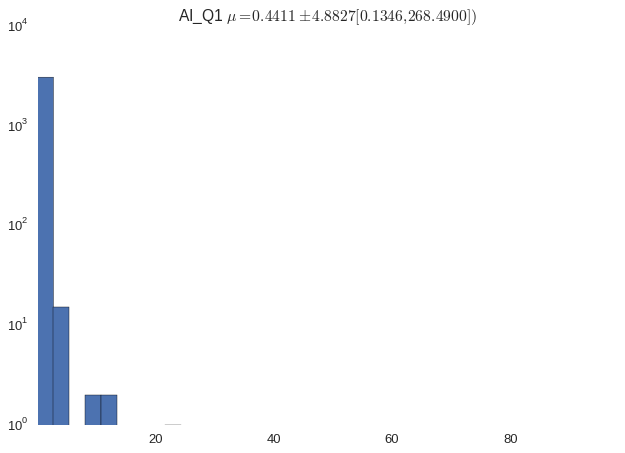

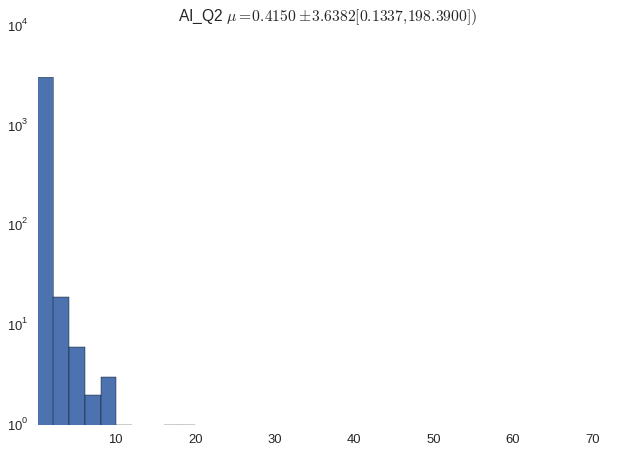

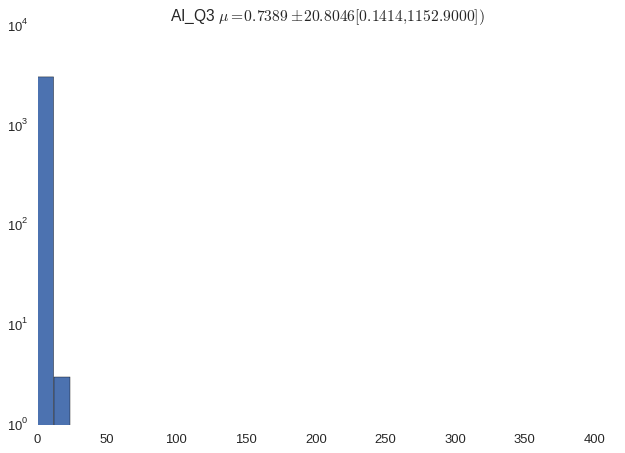

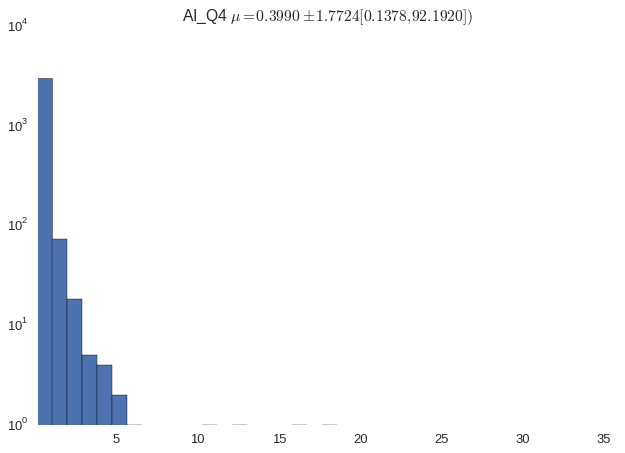

In [197]:
plot_outliers(bf, "bf", 20)

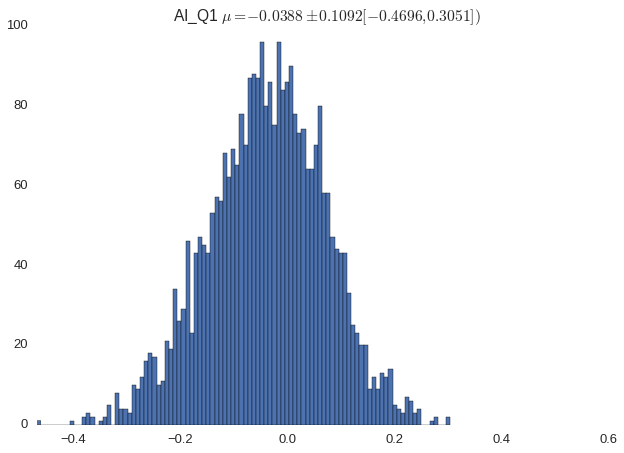

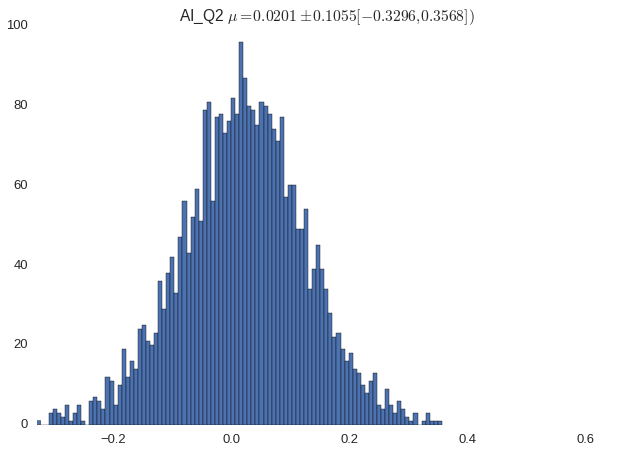

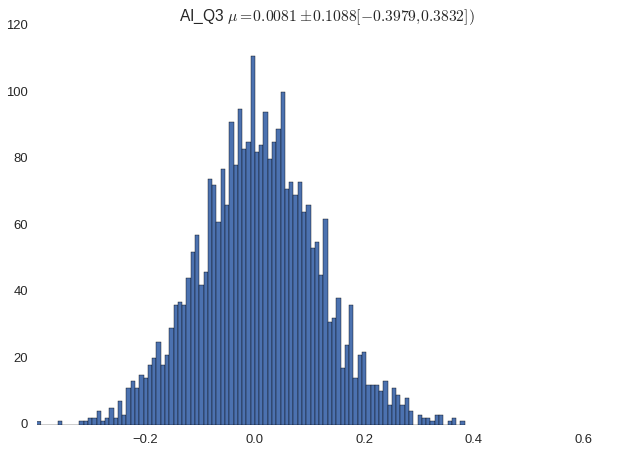

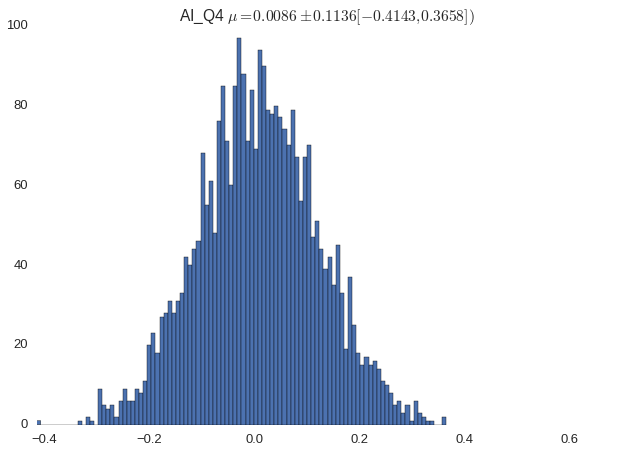

In [198]:
plot_outliers(bf, "rho", 6)

In [199]:
bf_outliers = get_outliers(bf, "bf", 6)    
rho_outliers = get_outliers(bf, "rho", 3)

In [200]:
%%R
library(VennDiagram)

In [201]:
def draw_venn(outliers, title):
    keys = sorted(list(outliers.keys()))
    a1 = set(outliers[keys[0]].index)
    a2 = set(outliers[keys[1]].index)
    a3 = set(outliers[keys[2]].index)
    a4 = set(outliers[keys[3]].index)
    area1 = len(a1)
    area2 = len(a2)
    area3 = len(a3) 
    area4 = len(a4)
    n12 = len(a1.intersection(a2))
    n13 = len(a1.intersection(a3))
    n14 = len(a1.intersection(a4))
    n23 = len(a2.intersection(a3))
    n24 = len(a2.intersection(a4))
    n34 = len(a3.intersection(a4))
    n123 = len(set.intersection(a1, a2, a3))
    n124 = len(set.intersection(a1, a2, a4))
    n134 = len(set.intersection(a1, a3, a4))
    n234 = len(set.intersection(a2, a3, a4))
    n1234 = len(set.intersection(a1, a2, a3, a4))
    venn = "venn_%s.png" % title.replace(" ", "_")
    r("library(VennDiagram)")
    r("png('%s')" % venn)
    r('draw.quad.venn')(area1, 
                  area2,
                  area3,
                  area4,
                  n12,
                  n13,
                  n14,
                  n23,
                  n24,
                  n34,
                  n123,
                  n124,
                  n134,
                  n234,
                  n1234,
                       category=keys)
    r('dev.off()')
    return venn

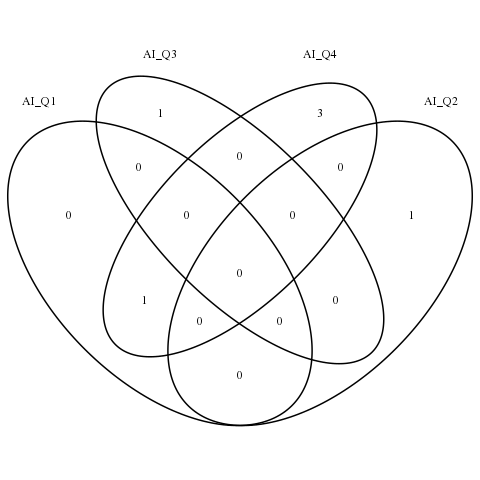

In [202]:
Image(draw_venn(bf_outliers, "Bayes factor outliers"))

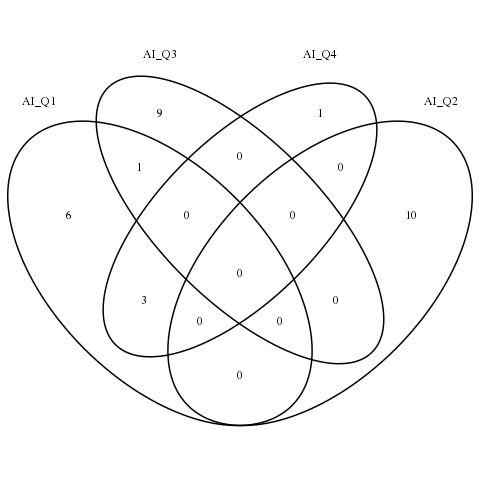

In [203]:
Image(draw_venn(rho_outliers, "Rho outliers"))

In [204]:
combined_outliers = {}
for key in bf_outliers:
    a = bf_outliers[key].index
    b = rho_outliers[key].index
    combined_outliers[key] = pd.Series(index=a.intersection(b))

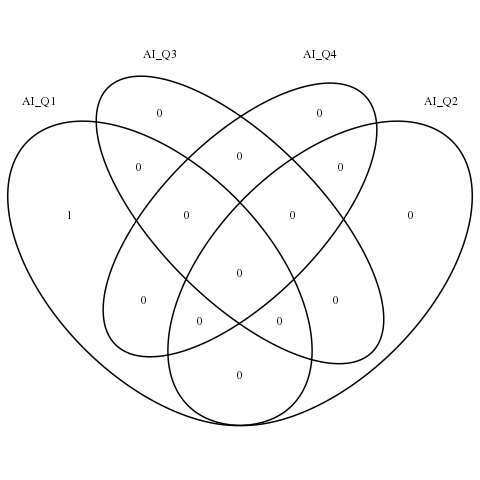

In [205]:
Image(draw_venn(combined_outliers, "combined"))

In [206]:
boxplot_data = {}
for key, val in bf_outliers.items():
    val = val.sort(inplace=False, ascending=False)
    boxplot_data[key] = {val.index[0]: val[0]}

In [207]:
boxplot_data

{u'AI_Q1': {'CL599Contig1-07-109': 268.49000000000001},
 u'AI_Q2': {'2-5279-01-367': 198.38999999999999},
 u'AI_Q3': {'0-6055-01-107': 1152.9000000000001},
 u'AI_Q4': {'CL599Contig1-07-109': 92.191999999999993}}

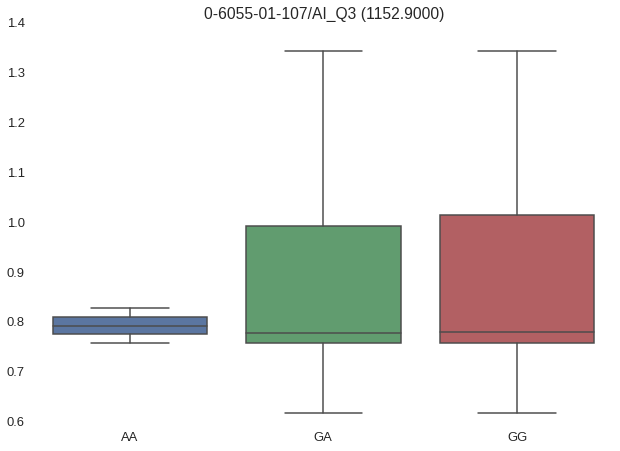

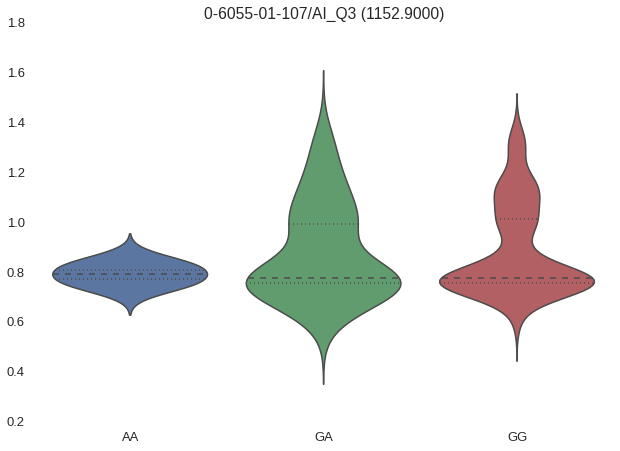

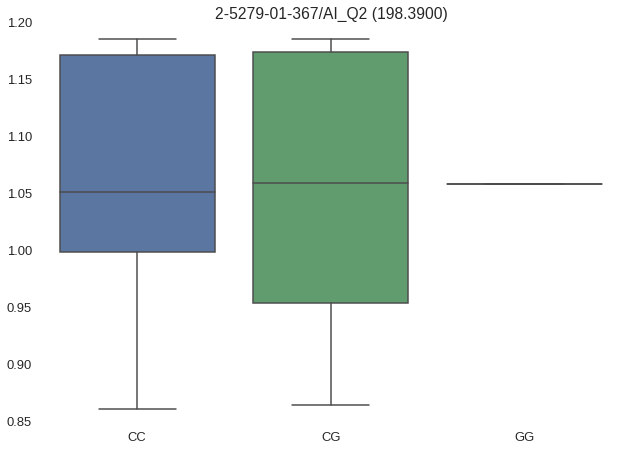

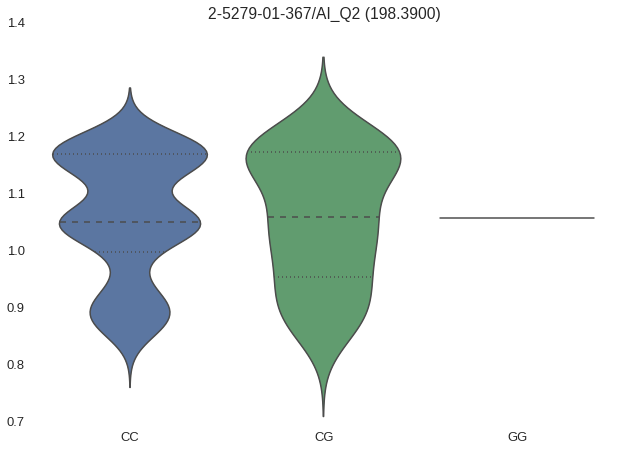

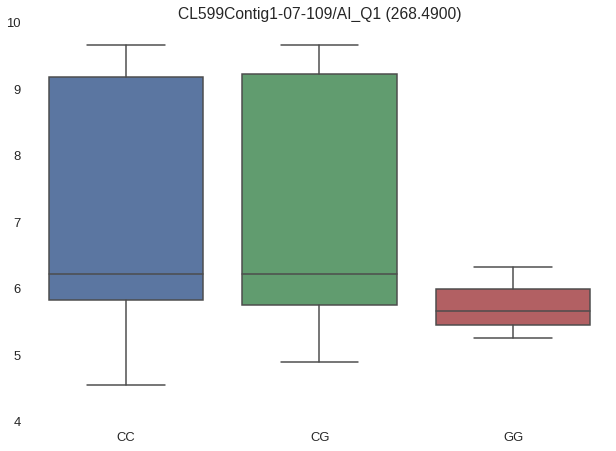

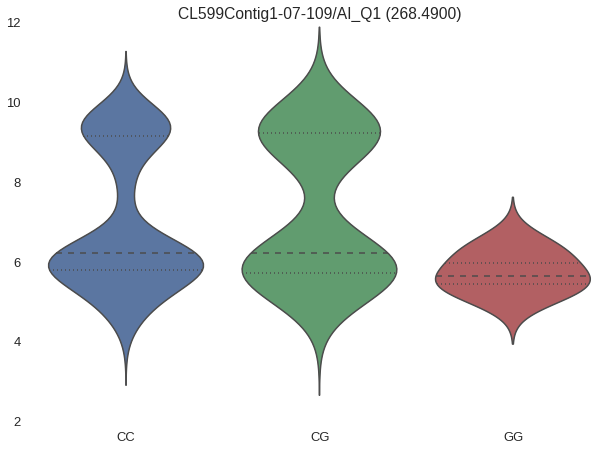

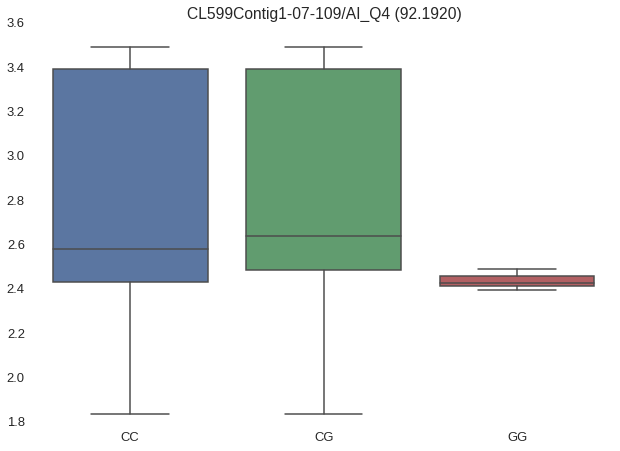

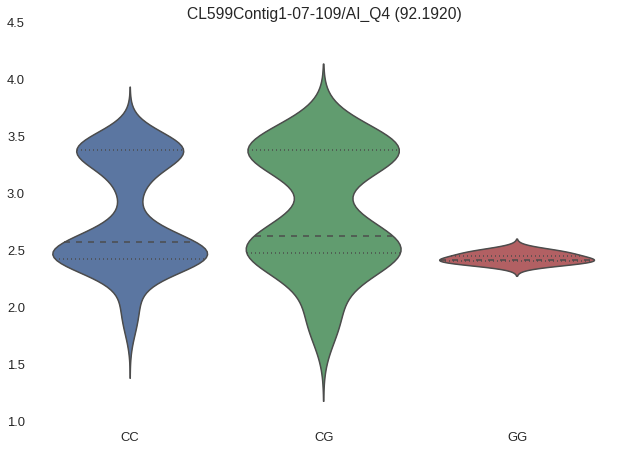

In [208]:
#bayenv_df_ai_basegt = bayenv_df_ai.apply(convert_to_snpassoc)
for env in boxplot_data:
    for snp in boxplot_data[env]:
        vals = {}
        for gt, group in bayenv_df_ai.groupby(snp):
            if not gt == 'NA':
                vals[gt.replace("/", "")] = group[env]
        vals = pd.DataFrame(vals, dtype=float)
        vals.index.name = env

        sns.boxplot([vals[x].dropna() for x in vals], 
                    names=vals.columns)
        plt.title("%s/%s (%.4f)" % (snp, vals.index.name, boxplot_data[env][snp]))
        plt.show()

        sns.violinplot([vals[x].dropna() for x in vals], 
                    names=vals.columns)
        plt.title("%s/%s (%.4f)" % (snp, vals.index.name, boxplot_data[env][snp]))
        plt.show()

In [212]:
perloc = hdf.get("perloc").T

In [214]:
xtx_files = !find {bayenv_dir} | grep xtx

In [221]:
xtx_data = {}
for f in xtx_files:
    f = open(f).readlines()[-1].split()
    f[0] = f[0].replace(".txt", "")
    xtx_data[f[0]] = float(f[1])

In [224]:
xtx = pd.Series(xtx_data)

In [266]:
cols = ["xtx"]
cols.extend(xtx_perloc.columns[1:])
xtx_perloc.columns = cols
xtx_perloc = xtx_perloc.dropna()
xtx_plot_data = xtx_perloc[xtx_perloc.Fst < 0.2]

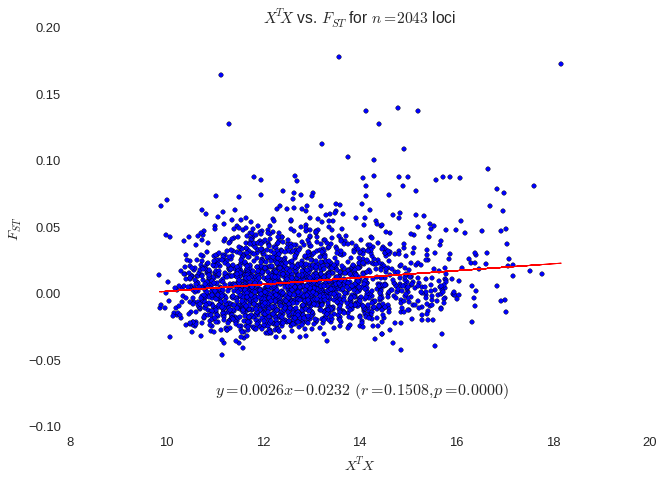

In [297]:
plt.scatter(xtx_plot_data.xtx, xtx_plot_data.Fst)
plt.title("$X^{T}\!X$ vs. $F_{ST}$ for $n = %d$ loci" % (len(xtx_plot_data)))
plt.xlabel("$X^T\!X$")
plt.ylabel("$F_{ST}$")
m, b, r, p, se = sp.stats.linregress(xtx_plot_data.xtx.values, xtx_plot_data.Fst.values)
plt.plot(xtx_plot_data.xtx, (xtx_plot_data.xtx*m + b), c="r", lw=1)
plt.text(11, -0.075, "$y = %.4fx %.4f \ (r = %.4f, p = %.4f)$" % (m, b, r, p), fontsize=16)
plt.show()